<a href="https://colab.research.google.com/github/tsparaskevas/ML_EDDE2/blob/main/Homework4_animals_Paraskevas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4, Part 1: Φτιάχνουμε ένα pandas cheat sheet

**Χρησιμοποιούμε το αρχείο `animals.csv` για να απαντήσουμε στις παρακάτω ερωτήσεις.** Το notebook αυτό θα μπορείτε να το χρησιμοποιήσετε μελλοντικά. 

## 0) Setup

Κάντε Import pandas **με την σωστή ονομασία** και εισάγετε την `matplotlib` για να εμφανίζονται τα γραφικά στο notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## 1) Διαβάστε το csv 


In [2]:
anim_df = pd.read_csv('https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week4/animals.csv')
anim_df

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50
4,cat,Charlie,32
5,dog,Fontaine,35


## 2) Τσεκάρετε τα δεδομένα 

Τυπώστε τον αριθμό γραμμών και στηλών καθώς και το όνομα και τον τύπο της κάθε στήλης (column).

In [3]:
# number of rows and columns
anim_df.shape

(6, 3)

In [4]:
# type of data in columns
anim_df.dtypes

animal    object
name      object
length     int64
dtype: object

In [5]:
# statistics
anim_df.describe()

,length
count,6.000000
mean,43.666667
std,12.516656
min,32.000000
25%,35.000000
50%,40.000000
75%,48.750000
max,65.000000


## 3) Τυπώστε τα πρώτα 3 ζώα.

Γνωρίζουμε πως να εμφανίσουμε τα πρώτα 5, αλλά όχι τα πρώτα 3. 

In [6]:
anim_df.head(3)

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


## 4) Σορτάρετε τα ζωά για να τυπώσετε τα 3 μακρύτερα 

> **Συμβουλή:** Χρησιμοποιήστε το `.head()` μετά το sort!

In [7]:
anim_df.sort_values('length', ascending=False).head(3)

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


## 5) Πάρτε το mean και το standard deviation από τα μήκη των ζώων.

In [8]:
# mean of length values
anim_df.length.mean()

43.666666666666664

In [9]:
# standard deviation of length values
anim_df.length.std()

12.516655570345725

## 6) Πόσες γάτες και πόσοι σκύλοι υπάρχουν στα δεδομένα? 


In [10]:
# unique values of animals (πόσα είδη ζώων υπάρχουν στα δεδομένα;)
len(anim_df['animal'].unique())  

2

In [11]:
# count dogs
dogs_nbr = anim_df[anim_df['animal'] == 'dog']['animal'].count()
# count cats
cats_nbr = anim_df[anim_df['animal'] == 'cat']['animal'].count()
print('There are', dogs_nbr, 'dogs and', cats_nbr, 'cats in data')

There are 3 dogs and 3 cats in data


## 7) Τυπώστε μόνο τους σκύλους 

> **Συμβουλή:** Είναι πιο εύκολο να τυπώσετε πρώτα τη λίστα με τα `True`/`False` και μετά βάλτε την εντολή μέσα σε ένα ακόμα `df[]`.

In [12]:
# dogs
anim_df[anim_df['animal'] == 'dog']

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


In [13]:
# cats
anim_df[anim_df['animal'] == 'cat']

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
4,cat,Charlie,32


Λίγο παιχνίδι για ξεσκούριασμα

In [14]:
# make a list of column names
cols = anim_df.columns
cols

Index(['animal', 'name', 'length'], dtype='object')

In [15]:
# select dogs
dogs = anim_df.animal == 'dog'
# print dogs names and length, shorted by length (ascending)
anim_df[dogs][cols[1:]].sort_values('length')

,name,length
5,Fontaine,35
3,Devon,50
2,Egglesburg,65


In [16]:
# select cats
cats = anim_df.animal == 'cat'
# print cats names and length, sorted by length (descending)
anim_df[cats][cols[1:]].sort_values('length', ascending=False)

,name,length
1,Bob,45
0,Anne,35
4,Charlie,32


## 8) Τυπώστε τα ζώα με μήκος μεγαλύτερο από 40cm

In [17]:
anim_df[anim_df['length'] > 40]

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50


## 9) `length` είναι το μέγεθος των ζώων σε εκατοστά. Φτιάξτε μια νέα στήλη που να λέγεται  `meters` και αντιστοιχεί στο μέγεθος των ζώων σε μέτρα. 

In [18]:
anim_df['meters'] = anim_df.length / 100
anim_df

,animal,name,length,meters
0,cat,Anne,35,0.35
1,cat,Bob,45,0.45
2,dog,Egglesburg,65,0.65
3,dog,Devon,50,0.50
4,cat,Charlie,32,0.32
5,dog,Fontaine,35,0.35


Λίγο παιχνίδι ακόμα

In [19]:
# σβήνω τη στήλη meters
anim_df.drop('meters', axis=1, inplace=True)
# make a copy of the df to make the changes
anim_df_copy = anim_df.copy(deep=True)
# make the column length(m), dividing length by 100
anim_df_copy['length(m)'] = anim_df_copy['length'] / 100
# rename column length to length(cm)
anim_df_copy.rename(columns={'length':'length(cm)'}, inplace=True)
anim_df_copy

,animal,name,length(cm),length(m)
0,cat,Anne,35,0.35
1,cat,Bob,45,0.45
2,dog,Egglesburg,65,0.65
3,dog,Devon,50,0.50
4,cat,Charlie,32,0.32
5,dog,Fontaine,35,0.35


## 10) Σώστε τις γάτες σε μια νέα μεταβλητή που να λέγεται  `cats` και σε μια άλλη τους σκύλους `dogs`. 

In [20]:
cats = anim_df[anim_df['animal'] == 'cat'][['name', 'length']]
cats

,name,length
0,Anne,35
1,Bob,45
4,Charlie,32


In [21]:
dogs = anim_df[anim_df['animal'] == 'dog'][anim_df.columns[1:]]
dogs

,name,length
2,Egglesburg,65
3,Devon,50
5,Fontaine,35


## 11) Τυπώστε όλα τα ζώα που είναι γάτες και το μήκος τους είναι πάνω από 12 εκατοστά 

Πρώτα κάντε το χρησιμοποιώντας την μεταβλητή `cats` και μετά ξανά σε όλο το `df`.

> **Συμβουλή:** Για πολλαπλά conditions, χρησιμοποιήστε `df[(one condition) & (another condition)]`

In [22]:
cats[cats['length'] > 12 ]

,name,length
0,Anne,35
1,Bob,45
4,Charlie,32


In [23]:
anim_df[(anim_df['animal'] == 'cat') & (anim_df['length'] > 12)][['name', 'length']]

,name,length
0,Anne,35
1,Bob,45
4,Charlie,32


## 12) Ποιο είναι το μέσο (mean) μήκος της γάτας και ποιο του σκύλου? 

In [24]:
# mean length for cats
mlc = (anim_df[anim_df['animal'] == 'cat']['length'].mean())
# mean length for dogs
mld = (anim_df[anim_df['animal'] == 'dog']['length'].mean())
print('Mean length for cats is', mlc, 'cm. (That is approximately', round(mlc), 'cm).')
print('Mean length for dogs is', mld, 'cm. (That is approximately', round(mld), 'cm).')

Mean length for cats is 37.333333333333336 cm. (That is approximately 37 cm).
Mean length for dogs is 50.0 cm. (That is approximately 50 cm).


## 13) Αν δεν το κάνατε ήδη χρησιμοποιήστε το `groupby` για να ξανατυπώσετε το #12 

In [25]:
anim_df.groupby('animal').mean()

,length
animal,
cat,37.333333
dog,50.000000


## 14) Φτιάξτε ένα ιστόγραμμα (histogram) με τα μήκη των σκύλων. 

Δεν γίνεται με χρήση του `plot()`. Αναζητήστε τη λύση στο ίντερνετ!


Freedman–Diaconis number of bins: 1


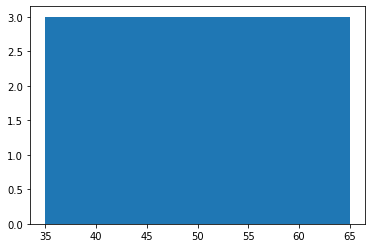

In [26]:
x = dogs.length
# Για τον υπολογισμό των bins κατά Freedman-Diacosis 
q25, q75 = np.percentile(x, [25, 75])
bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
bins = round((x.max() - x.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(x, bins=bins);
# εμείς εδώ έχουμε πολύ μικρό δείγμα, οπότε θα αγνοήσουμε το 1 που δίνει για τα bins και θα βάλουμε 30) 

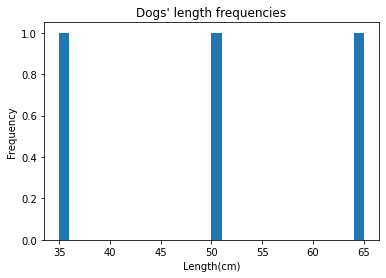

In [27]:
# Λύση με matplotlib
#x = dogs.length
plt.hist(x, density=False, bins=30)  # density=True would make percentages
plt.ylabel('Frequency')
plt.xlabel('Length(cm)')
plt.title('Dogs\' length frequencies');

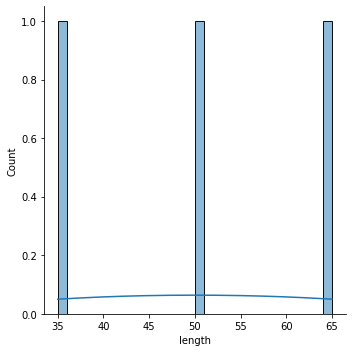

In [28]:
# Με τη συντομία που προσφέρει η Seaborn, ο παραπάνω κώδικας γίνεται μόλις 1 γραμμή!
import seaborn as sns
sns.displot(x, bins=30, kde=True);

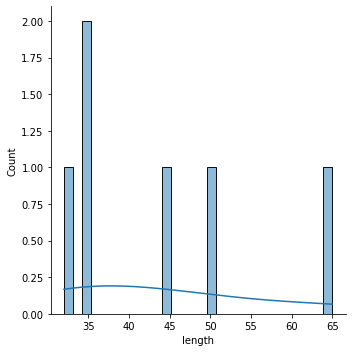

In [29]:
# Histogram με τα μήκη όλων των ζώων
y = anim_df.length
sns.displot(y, bins=30, kde=True)

## 15) Φτιάξτε ένα οριζόντιο γράφημα με τα μήκη των ζώων και με το όνομά τους στο label

> **Συμβουλή:** Δεν είναι με `df['length'].plot()`, γιατί χρειάζεται δύο στήλες. 

> **Συμβουλή:** Μπορείτε να αλλάξετε το μέγεθος του γραφήματος με `figsize=(2,15)`

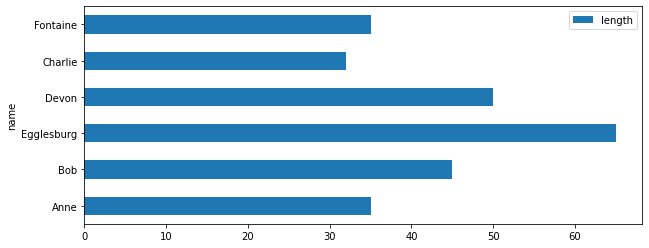

In [30]:

ax = anim_df.plot.barh(x='name', y='length', figsize=(10,4))

## 16) Φτιάξτε ένα σορταρισμένο οριζόντιο γράφημα με τις γάτες και οι μακρύτερες να βρίσκονται στην κορυφή. 

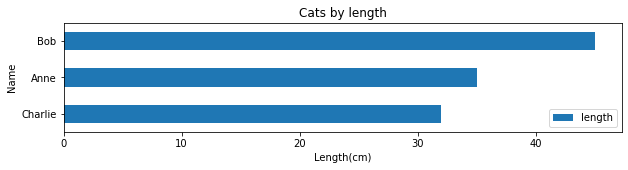

In [31]:
ax = cats.sort_values('length').plot.barh(x='name', y='length', figsize=(10,2))
ax.set_title("Cats by length")
ax.set_xlabel("Length(cm)")
ax.set_ylabel("Name");